In [4]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib
# %matplotlib notebook
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

X = np.load('E:/PycharmProjects/TDRL/predict_data.npy')
Y = np.load('E:/PycharmProjects/TDRL/data_single_lane.npy')

In [5]:
data_full = DataFrame(Y.T,columns=[x for x in range(48)],index=pd.date_range('2018-10-08 00:05:00',periods=6048,freq='300s'))
data_full.shape
data_full.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
2018-10-08 00:05:00,31.0,24.0,26.0,27.0,35.0,32.0,53.0,33.0,52.0,34.0,...,41.0,23.0,31.0,14.0,78.0,29.0,69.0,32.0,36.0,28.0
2018-10-08 00:10:00,25.0,21.0,40.0,25.0,50.0,33.0,52.0,32.0,50.0,28.0,...,30.0,20.0,22.0,17.0,63.0,35.0,61.0,33.0,32.0,32.0
2018-10-08 00:15:00,28.0,27.0,25.0,31.0,38.0,35.0,62.0,36.0,63.0,38.0,...,35.0,32.0,19.0,25.0,57.0,39.0,63.0,38.0,34.0,32.0
2018-10-08 00:20:00,23.0,18.0,28.0,19.0,38.0,22.0,43.0,31.0,42.0,32.0,...,37.0,21.0,29.0,20.0,94.0,36.0,80.0,37.0,45.0,36.0
2018-10-08 00:25:00,31.0,27.0,27.0,30.0,37.0,42.0,28.0,20.0,32.0,19.0,...,30.0,23.0,22.0,15.0,59.0,26.0,54.0,28.0,25.0,24.0


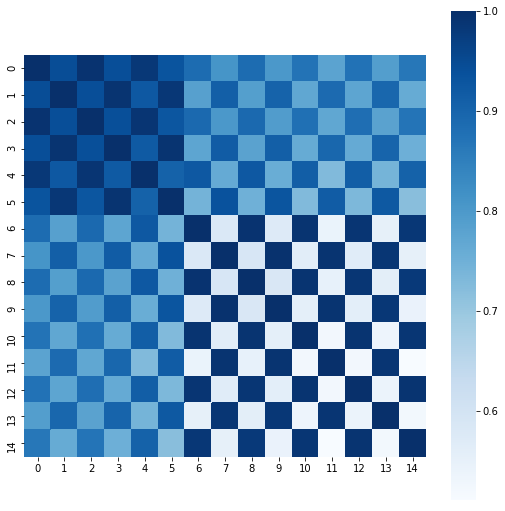

In [39]:
import seaborn as sns
# data_part = data_full.loc[:,[20, 22, 24, 32, 36, 40]]
data_part = data_full.loc[:,[x for x in range(15)]]
data_part_cor = data_part.corr()
plt.subplots(figsize=(9,9))
sns.heatmap(data_part_cor,annot=False,vmax=1,square=True,cmap="Blues")
plt.show()

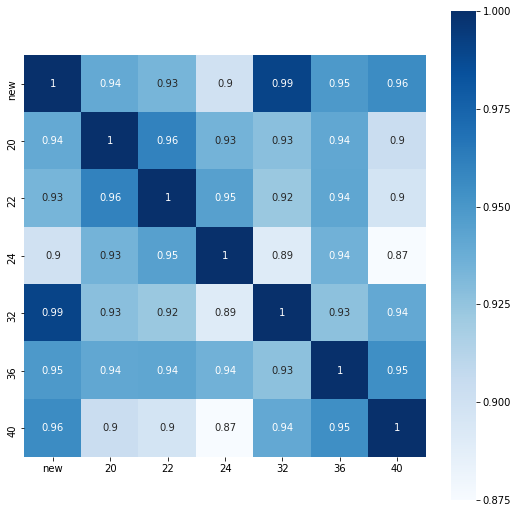

In [33]:
# 聚类后的数据
data_cluster = DataFrame(X.T,columns=[x for x in range(10)],index=pd.date_range('2018-10-08 00:05:00',periods=6048,freq='300s'))
# data_part = data_full.loc[:,[0,5,7,18,26,31,35,47]]
data_part2 = data_cluster.loc[:,[9]]
data_part2.columns = ["new"]
data_sum = pd.concat((data_part2,data_part),axis=1)
data_part_cor = data_sum.corr()
plt.subplots(figsize=(9,9))
sns.heatmap(data_part_cor,annot=True,vmax=1,square=True,cmap="Blues")
plt.show()

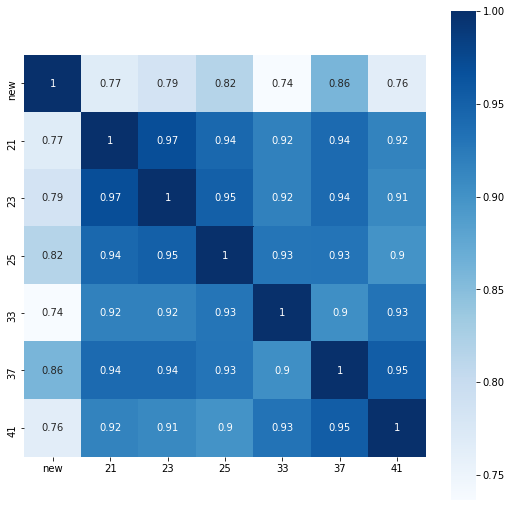

In [34]:
# 聚类后的数据
data_cluster = DataFrame(X.T,columns=[x for x in range(10)],index=pd.date_range('2018-10-08 00:05:00',periods=6048,freq='300s'))
# data_part = data_full.loc[:,[0,5,7,18,26,31,35,47]]
data_part2 = data_cluster.loc[:,[9]]
data_part2.columns = ["new"]
data_part = data_full.loc[:,[21, 23, 25, 33, 37, 41]]
data_sum = pd.concat((data_part2,data_part),axis=1)
data_part_cor = data_sum.corr()
plt.subplots(figsize=(9,9))
sns.heatmap(data_part_cor,annot=True,vmax=1,square=True,cmap="Blues")
plt.show()

d:\program files\python\python3.5\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


(-8.4857054635405476, 1.3551814324435962e-13, 27, 6020, {'10%': -2.5670256256829393, '1%': -3.4314367260072971, '5%': -2.8620202332935389}, 49212.05931680488)


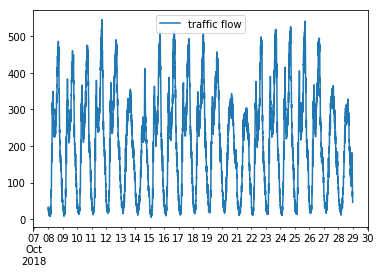

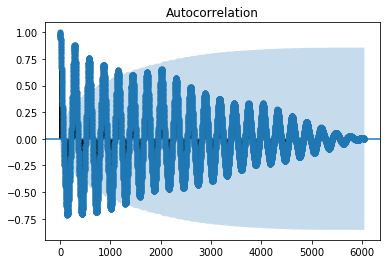

In [8]:
data = X[0] # 取出2018.10.8
data_pd = DataFrame(data,columns=['traffic flow'],index=pd.date_range('2018-10-08 00:05:00',periods=6048,freq='300s'))
data_pd.plot()
plot_acf(data_pd).show()

from statsmodels.tsa.stattools import adfuller as ADF

adf = ADF(data_pd['traffic flow'])
print(adf)

d:\program files\python\python3.5\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


(-5.0436505725216891, 1.8177124342711246e-05, 26, 1989, {'10%': -2.5675441640359331, '1%': -3.4336419856688276, '5%': -2.8629942176113219}, 16190.9960044992)


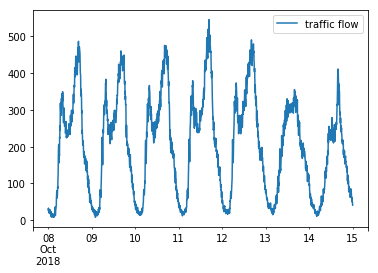

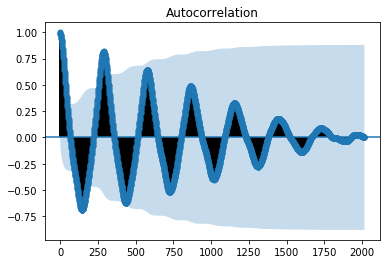

In [9]:
data_1week = data_pd[0:2016]
data_1week.plot()
plot_acf(data_1week).show()
# plot_pacf(data_1week).show()


adf = ADF(data_1week['traffic flow'])
print(adf)

d:\program files\python\python3.5\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


(-2.4985652855049501, 0.11582379666373449, 13, 274, {'10%': -2.572422013959188, '1%': -3.4544435065994437, '5%': -2.8721468827772774}, 2215.4058766053968)


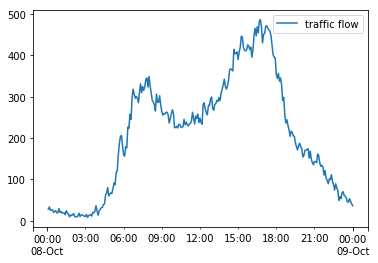

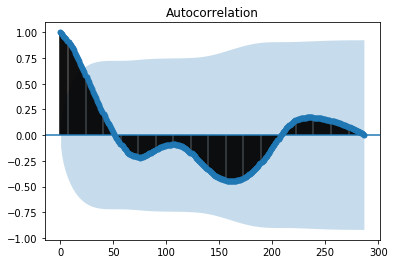

In [10]:
data_1day = data_pd[0:288]
data_1day.plot()
plot_acf(data_1day).show()

adf = ADF(data_1day['traffic flow'])
print(adf)

d:\program files\python\python3.5\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
d:\program files\python\python3.5\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


(-2.0120568293456129, 0.28131174973736117, 12, 274, {'10%': -2.572422013959188, '1%': -3.4544435065994437, '5%': -2.8721468827772774}, 2212.5099973522147)


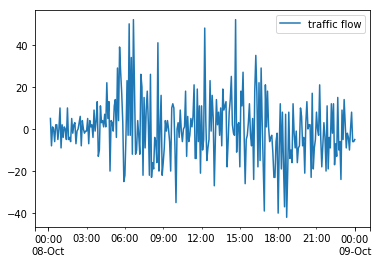

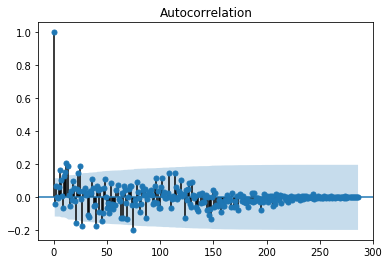

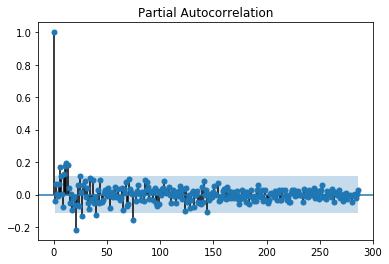

In [11]:
D_data = data_1day.diff().dropna()
D_data.columns = ['traffic flow']
D_data.plot()
plot_acf(D_data).show()
plot_pacf(D_data,method='ywm' ).show()

adf = ADF(D_data['traffic flow'])
print(adf)

d:\program files\python\python3.5\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
d:\program files\python\python3.5\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


(-2.6833705954394369, 0.07696035251038591, 12, 263, {'10%': -2.5726600403359887, '1%': -3.4554613060274972, '5%': -2.8725931472675046}, 2213.9808727149511)


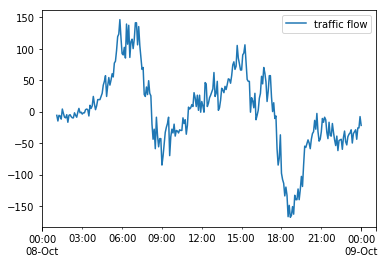

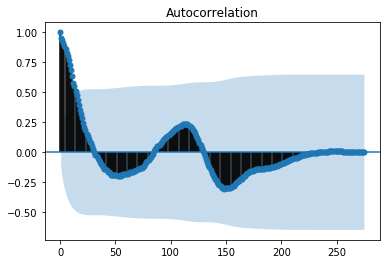

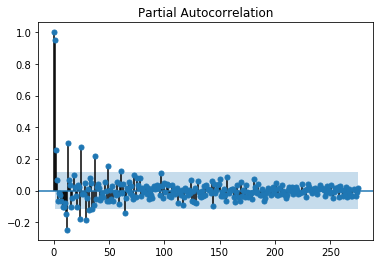

In [12]:
D_data = data_1day.diff(12).dropna()
D_data.columns = ['traffic flow']
D_data.plot()
plot_acf(D_data).show()
plot_pacf(D_data,method='ywm').show()

adf = ADF(D_data['traffic flow'])
print(adf)

d:\program files\python\python3.5\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
d:\program files\python\python3.5\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


(-2.2851484193208975, 0.17680264913868055, 8, 255, {'10%': -2.5728461399461744, '1%': -3.4562572510874396, '5%': -2.8729420379793598}, 2201.5366639886242)


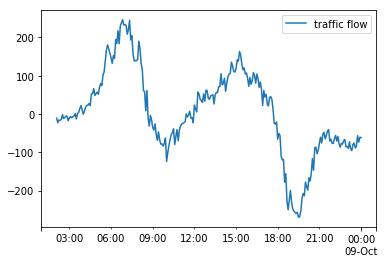

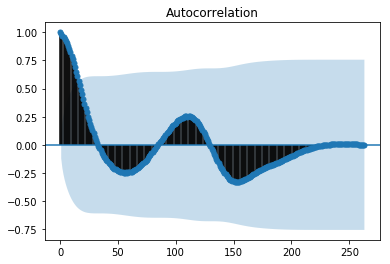

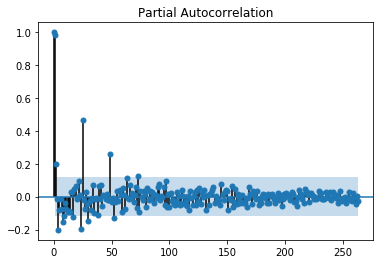

In [13]:
D_data = data_1day.diff(24).dropna()
D_data.columns = ['traffic flow']
D_data.plot()
plot_acf(D_data).show()
plot_pacf(D_data,method='ywm').show()

adf = ADF(D_data['traffic flow'])
print(adf)

d:\program files\python\python3.5\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
d:\program files\python\python3.5\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


(-3.1259982704689246, 0.024688074114898931, 13, 238, {'10%': -2.5732834559706235, '1%': -3.458128284586202, '5%': -2.8737618352392862}, 2081.9374485237295)


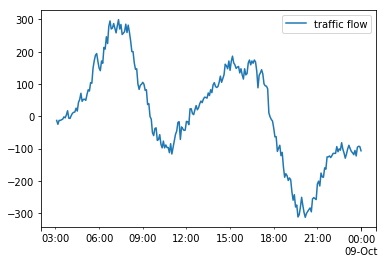

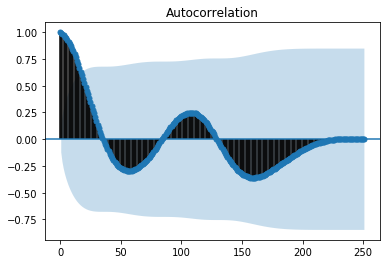

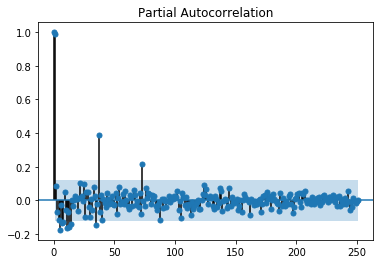

In [14]:
D_data = data_1day.diff(36).dropna()
D_data.columns = ['traffic flow']
D_data.plot()
plot_acf(D_data).show()
plot_pacf(D_data,method='ywm').show()

adf = ADF(D_data['traffic flow'])
print(adf)

(-11.011790263238803, 6.2985079896788104e-20, 34, 6001, {'10%': -2.5670264352755625, '1%': -3.4314401682063327, '5%': -2.8620217541511295}, 50393.095093266638)


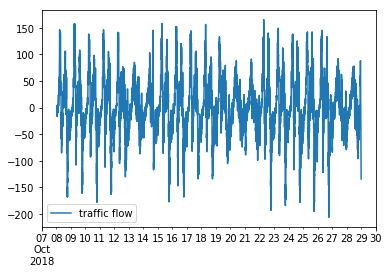

In [15]:
D_data = data_pd.diff(12).dropna()
D_data.columns = ['traffic flow']
D_data.plot()
# plot_acf(D_data).show()
# plot_pacf(D_data,method='ywm').show()

adf = ADF(D_data['traffic flow'])
print(adf)

(-9.3992314275398527, 6.2525439463040856e-16, 31, 5992, {'10%': -2.567026820559366, '1%': -3.4314418063441647, '5%': -2.8620224779245671}, 51088.540774428628)


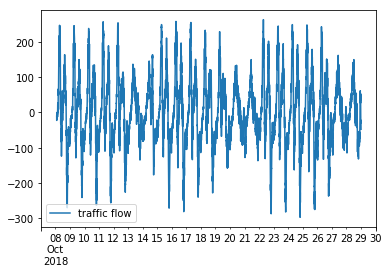

In [16]:
D_data = data_pd.diff(24).dropna()
D_data.columns = ['traffic flow']
D_data.plot()
# plot_acf(D_data).show()
# plot_pacf(D_data,method='ywm').show()

adf = ADF(D_data['traffic flow'])
print(adf)

(-9.8575275638607351, 4.3195511688743295e-17, 34, 5977, {'10%': -2.5670274652782687, '1%': -3.431444547541544, '5%': -2.8620236890585464}, 52719.456136051151)


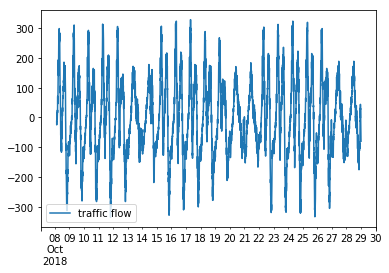

In [17]:
D_data = data_pd.diff(36).dropna()
D_data.columns = ['traffic flow']
D_data.plot()
# plot_acf(D_data).show()
# plot_pacf(D_data,method='ywm').show()

adf = ADF(D_data['traffic flow'])
print(adf)